# Coursework Q1  by Christopher pang, 220457882 

## Plotting for Q1a)

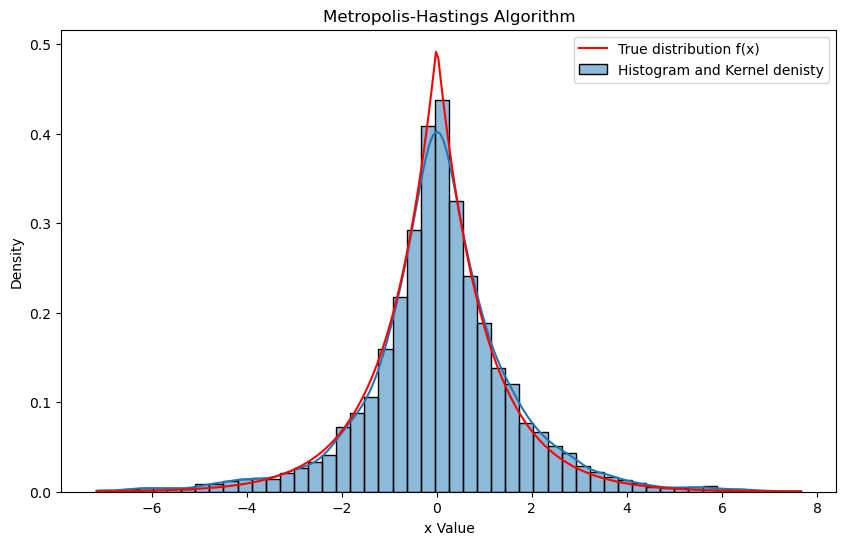

Sample Mean: 0.05988072554481421
Sample Standard Deviation: 1.569864205905775


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, uniform



# Defining Parameters
N = 10000  # Number of samples to generate
s = 1      # Standard deviation for proposal distribution
x0 = 0     # Initial value

# probability density function
def f(x):
    return 0.5 * np.exp(-abs(x))

# Metropolis-Hastings Algorithm implementation
def metropolis_hastings(N, s, x0):
    x = np.zeros(N)
    x[0] = x0
    for i in range(1, N):
        x_star = np.random.normal(x[i-1], s)  # Propose a new value
        r = f(x_star) / f(x[i-1])  # Compute the ratio using the target density
        u = np.random.uniform()  # Draw a uniform random number
        if u < r:
            x[i] = x_star  # Accept the proposal
        else:
            x[i] = x[i-1]  # Reject the proposal
    return x

# Run the Metropolis-Hastings algorithm
samples = metropolis_hastings(N, s, x0)

# Plotting the graph 
plt.figure(figsize=(10, 6))
sns.histplot(samples, bins=50, kde=True, stat='density', label='Histogram and Kernel denisty')
x_values = np.linspace(min(samples), max(samples), 300)
plt.plot(x_values, f(x_values), 'r-', label='True distribution f(x)')
plt.title('Metropolis-Hastings Algorithm')
plt.xlabel('x Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# printing sample mean and standard deviation
sample_mean = np.mean(samples)
sample_std = np.std(samples)
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")

## Plotting for Q1b)

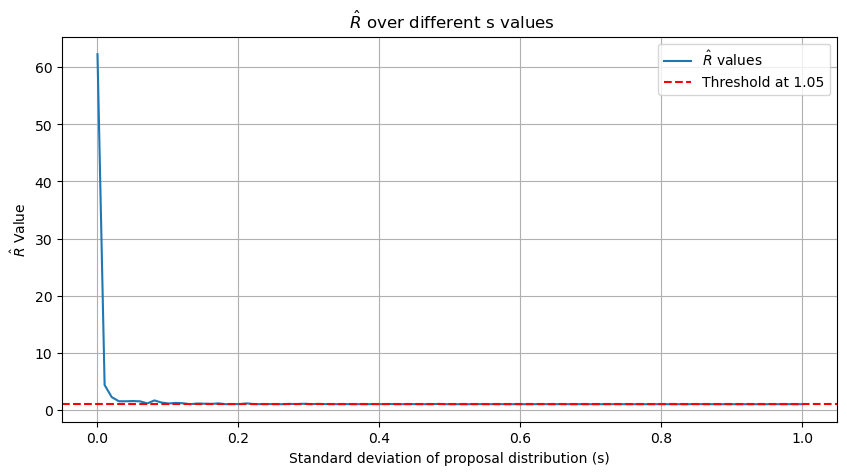

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1/2 * np.exp(-np.abs(x))

def metropolis(N, initial_x, s):
    x = np.zeros(N)
    x[0] = initial_x
    for i in range(1, N):
        x_star = np.random.normal(x[i-1], s)
        ratio = f(x_star) / f(x[i-1])
        if np.random.uniform() < ratio:
            x[i] = x_star
        else:
            x[i] = x[i-1]
    return x

def calculate_R_hat(chains):
    n = len(chains[0])
    J = len(chains)
    
    # Calculate within-chain variances
    W = np.mean([np.var(chain, ddof=1) for chain in chains])
    
    # Calculate between-chain variance
    chain_means = np.mean(chains, axis=1)
    overall_mean = np.mean(chain_means)
    B = n * np.sum((chain_means - overall_mean)**2) / (J - 1)
    
    # Estimate of marginal posterior variance
    var_hat_plus = (n - 1)/n * W + B/n
    
    # Calculate R_hat
    R_hat = np.sqrt(var_hat_plus / W)
    return R_hat

# Parameters
N = 2000
s_values = np.linspace(0.001, 1, 100)
initial_xs = [0, 1, -1, 0.5]  # Different initial values f
R_hats = []

for s in s_values:
    chains = [metropolis(N, x0, s) for x0 in initial_xs]
    R_hat = calculate_R_hat(chains)
    R_hats.append(R_hat)

# Plot R_hat over different values of s
plt.figure(figsize=(10, 5))
plt.plot(s_values, R_hats, label='$\hat{R}$ values')
plt.axhline(1.05, color='red', linestyle='--', label='Threshold at 1.05')
plt.xlabel('Standard deviation of proposal distribution (s)')
plt.ylabel('$\hat{R}$ Value')
plt.title(' $\hat{R}$ over different s values')
plt.legend()
plt.grid(True)
plt.show()